In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.shape

(11251, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Data Cleaning

In [5]:
#Dropping columns with null values
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [6]:
#Checking for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
#Dropping null values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
#Checking for duplicates
df.duplicated().sum()

8

In [10]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

In [11]:
df["Amount"].dtype

dtype('float64')

In [12]:
#Changing the datatype for "Amount" column
df["Amount"].astype("int64")

0        23952
1        23934
2        23924
3        23912
4        23877
         ...  
11246      370
11247      367
11248      213
11249      206
11250      188
Name: Amount, Length: 11231, dtype: int64

In [13]:
df["Amount"]=df["Amount"].astype("int64")
df["Amount"].dtype

dtype('int64')

In [53]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### Exploratory Data Analysis

In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### Gender

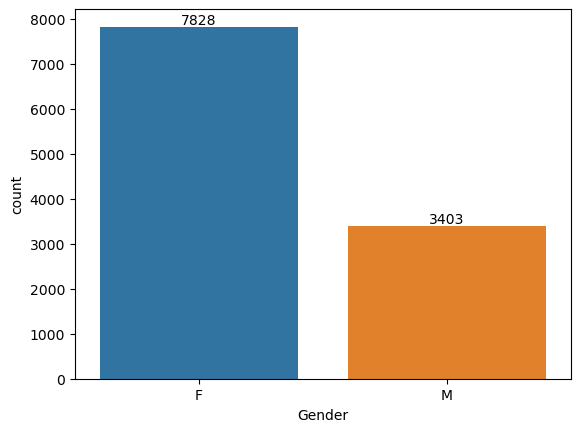

In [69]:
ax=sns.countplot(x=df["Gender"],data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [88]:
df.groupby("Gender").sum()["Amount"]

Gender
F    74307679
M    31871146
Name: Amount, dtype: int64

#### From the above graphs, we can see that most of the buyers are females and even the purchasing power of females is more than the men

#### Age

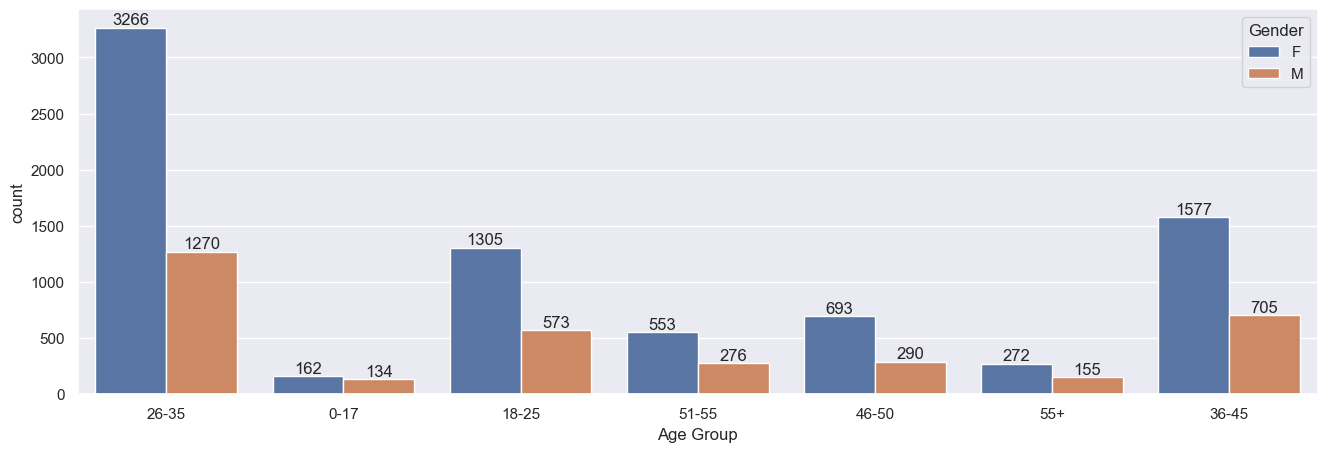

In [115]:
ax=sns.countplot(x="Age Group",hue="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [102]:
df.groupby("Age Group").sum()["Amount"].sort_values(ascending=False)

Age Group
26-35    42581767
36-45    22135135
18-25    17235530
46-50     9207844
51-55     8237909
55+       4080987
0-17      2699653
Name: Amount, dtype: int64

#### Here we can infer that most of the buyers are from the age group of 26-35 

#### State

<Axes: xlabel='State', ylabel='Orders'>

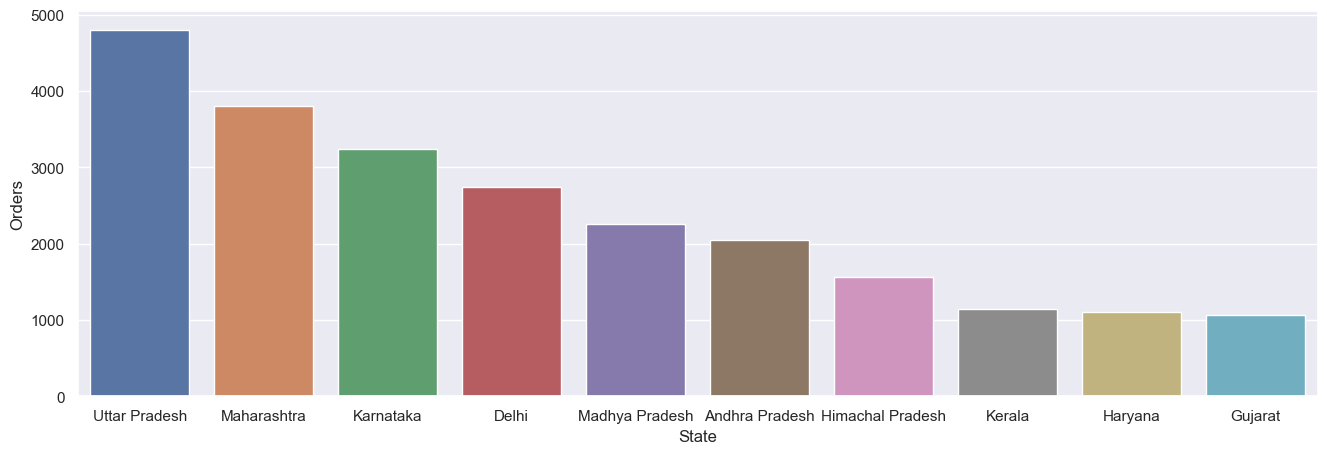

In [141]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

#### We can see that the maximum orders are from Uttar Pradesh and Maharashtra

#### Occupation

<Axes: xlabel='Occupation', ylabel='Amount'>

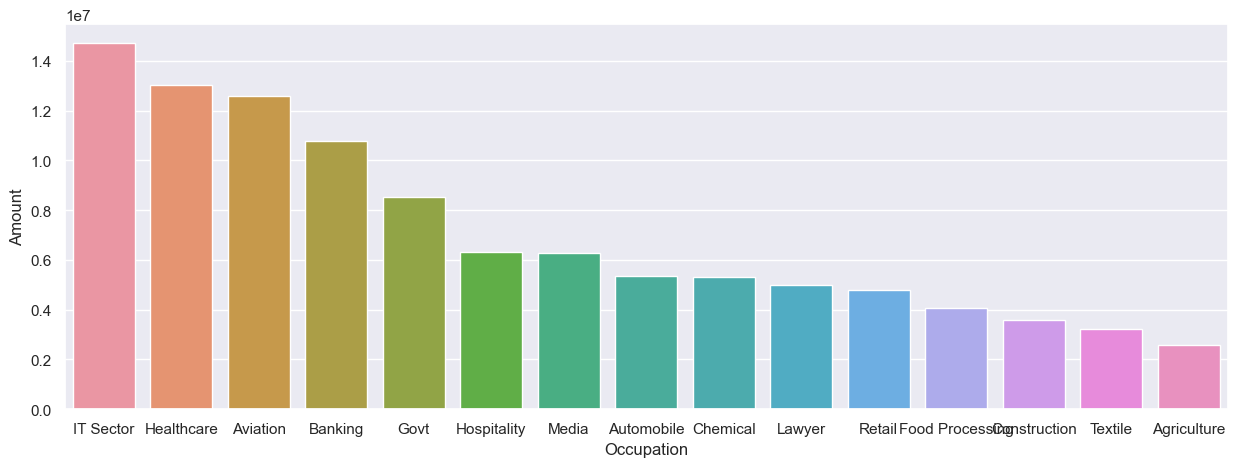

In [139]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

#### From the above graphs we can see that IT, Healthcare and Aviation sectors have higher purchsing power 

#### Product Category

<Axes: xlabel='Product_Category', ylabel='Amount'>

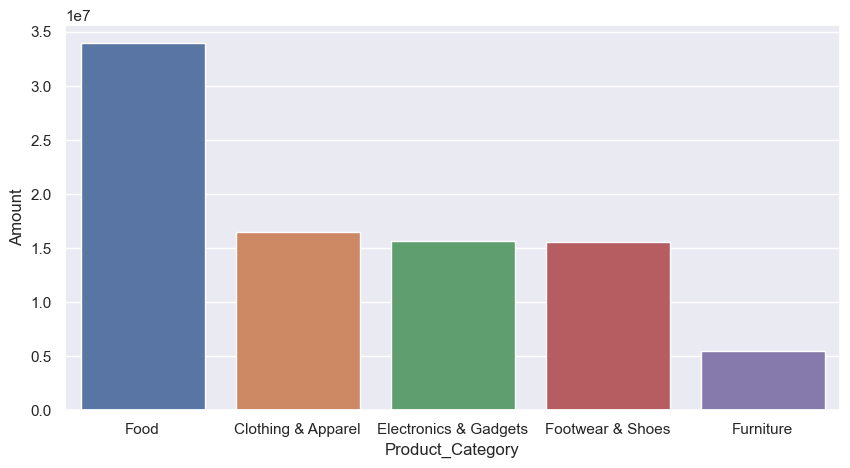

In [133]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

### Conclusion

#### Females of age group 26-35 years living in Uttar Pradesh, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing anf Electronics category.